Defining functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

def plot_simulink_data(mat_file_path, variable_name=None):
    """
    Plot 8 rows of data from a Simulink .mat file
    
    Parameters:
    mat_file_path: str - path to the .mat file
    variable_name: str - name of the variable in the mat file (if None, will try to auto-detect)
    """
    
    # Load the .mat file
    try:
        mat_data = loadmat(mat_file_path)
        print(f"Available variables in .mat file: {list(mat_data.keys())}")
    except FileNotFoundError:
        print(f"Error: File {mat_file_path} not found!")
        return
    except Exception as e:
        print(f"Error loading .mat file: {e}")
        return
    
    # Remove metadata keys that scipy.io adds
    data_keys = [key for key in mat_data.keys() if not key.startswith('__')]
    
    # Try to find the data variable
    if variable_name is None:
        if len(data_keys) == 1:
            variable_name = data_keys[0]
            print(f"Using variable: {variable_name}")
        else:
            print(f"Multiple variables found: {data_keys}")
            print("Please specify variable_name parameter")
            return
    
    # Extract the data
    try:
        data = mat_data[variable_name]
        print(f"Data shape: {data.shape}")
    except KeyError:
        print(f"Error: Variable '{variable_name}' not found in .mat file")
        print(f"Available variables: {data_keys}")
        return
    
    # Check if we have the expected 8 rows
    if data.shape[0] != 8:
        print(f"Warning: Expected 8 rows, but found {data.shape[0]} rows")
        print("Proceeding with available rows...")
    
    # Define the variable names in order
    var_names = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'pc', 'e_dot_c', 'vs', 'vd']
    
    # Use only as many names as we have rows
    num_rows = min(len(var_names), data.shape[0])
    var_names = var_names[:num_rows]
    
    # Extract time vector (first row)
    time = data[0, :]
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 1, figsize=(12, 2*num_rows))
    
    # Handle case where we only have one subplot
    if num_rows == 1:
        axes = [axes]
    
    # Plot each variable
    for i in range(num_rows):
        if i == 0:
            # For time, plot against index since it's the time vector itself
            axes[i].plot(range(len(data[i, :])), data[i, :])
            axes[i].set_xlabel('Sample Index')
        else:
            # For other variables, plot against time
            axes[i].plot(time, data[i, :])
            axes[i].set_xlabel('Time')
        
        axes[i].set_ylabel(var_names[i])
        axes[i].set_title(f'{var_names[i]} vs {"Sample Index" if i == 0 else "Time"}')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return data

def plot_specific_variables(mat_file_path, variable_name=None, variables_to_plot=None):
    """
    Plot specific variables from the data
    
    Parameters:
    mat_file_path: str - path to the .mat file
    variable_name: str - name of the variable in the mat file
    variables_to_plot: list - indices of variables to plot (e.g., [1, 2, 3] for pitch, pitch rate, elevation rate)
    """
    
    # Load data
    mat_data = loadmat(mat_file_path)
    data_keys = [key for key in mat_data.keys() if not key.startswith('__')]
    
    if variable_name is None:
        variable_name = data_keys[0] if len(data_keys) == 1 else input(f"Select variable from {data_keys}: ")
    
    data = mat_data[variable_name]
    var_names = ['Time', 'Pitch', 'Pitch Rate', 'Elevation Rate', 'pc', 'e_dot_c', 'vs', 'vd']
    
    if variables_to_plot is None:
        variables_to_plot = range(1, min(8, data.shape[0]))  # Skip time, plot all others
    
    time = data[0, :]
    
    # Create subplot
    fig, axes = plt.subplots(len(variables_to_plot), 1, figsize=(12, 2*len(variables_to_plot)))
    
    if len(variables_to_plot) == 1:
        axes = [axes]
    
    for idx, var_idx in enumerate(variables_to_plot):
        if var_idx < data.shape[0]:
            axes[idx].plot(time, data[var_idx, :])
            axes[idx].set_ylabel(var_names[var_idx])
            axes[idx].set_title(f'{var_names[var_idx]} vs Time')
            axes[idx].grid(True, alpha=0.3)
    
    axes[-1].set_xlabel('Time')
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Replace with your .mat file path
    mat_file = "your_simulink_data.mat"
    
    # Plot all variables
    # data = plot_simulink_data(mat_file)
    
    # Or plot specific variables (e.g., just pitch and pitch rate)
    # plot_specific_variables(mat_file, variables_to_plot=[1, 2])
    
    print("To use this script:")
    print("1. Replace 'your_simulink_data.mat' with your actual file path")
    print("2. Run: data = plot_simulink_data('your_file.mat')")
    print("3. Or specify variable name: data = plot_simulink_data('your_file.mat', 'variable_name')")

To use this script:
1. Replace 'your_simulink_data.mat' with your actual file path
2. Run: data = plot_simulink_data('your_file.mat')
3. Or specify variable name: data = plot_simulink_data('your_file.mat', 'variable_name')


Available variables in .mat file: ['ans']
Data shape: (8, 9435)


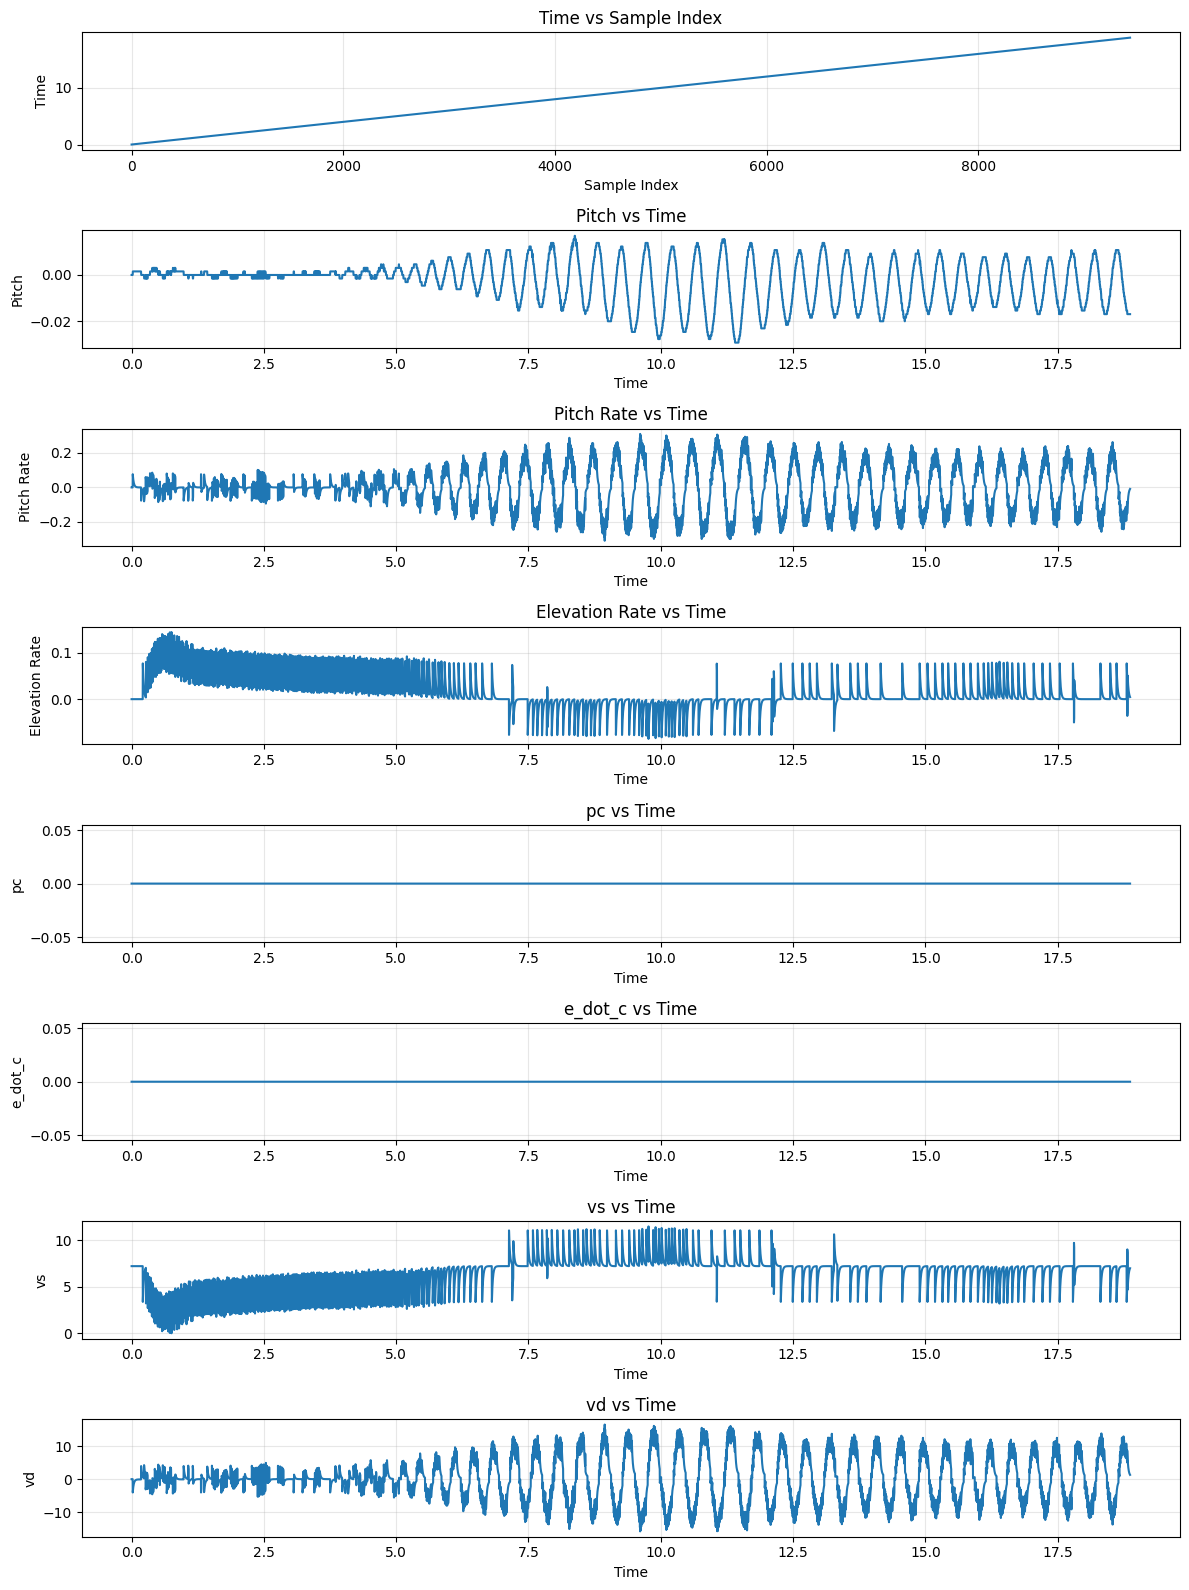

In [ ]:
data = plot_simulink_data("Q100_100_100R_0_04.mat", "ans")  # 'ans' is common for To File blocks
data = plot_simulink_data("Q10_10_100R1.mat", "ans")  # 'ans' is common for To File blocks
data = plot_simulink_data("Q100R1.mat", "ans")  # 'ans' is common for To File blocks